In [4]:
import pandas as pd
from nltk import FreqDist
from nltk.stem import SnowballStemmer
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.stats.contingency_tables import mcnemar
import statsmodels.api as sm
import statsmodels.stats.proportion as ssp
import matplotlib
import matplotlib.pyplot as plt
from cycler import  cycler

In [5]:
evals = "/content/drive/MyDrive/COS /Independent Work/cleaned_evaluations.csv"

evals = pd.read_csv(evals)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
evals_by_sem = evals['semester'].value_counts()
print("Total Evaluations Post-Cleaning: " , evals_by_sem.sum(), "\nAverage Evaluations per Semester: ", evals_by_sem.sum()/len(evals_by_sem))

Total Evaluations Post-Cleaning:  137128 
Average Evaluations per Semester:  9794.857142857143


Number of Depts Post-Cleaning:  75 
Average Evaluations per Department:  1828.3733333333332
Mediam Evaluations per Dept:  1134.0


Text(0.5, 1.0, 'Total Evaluations per Department')

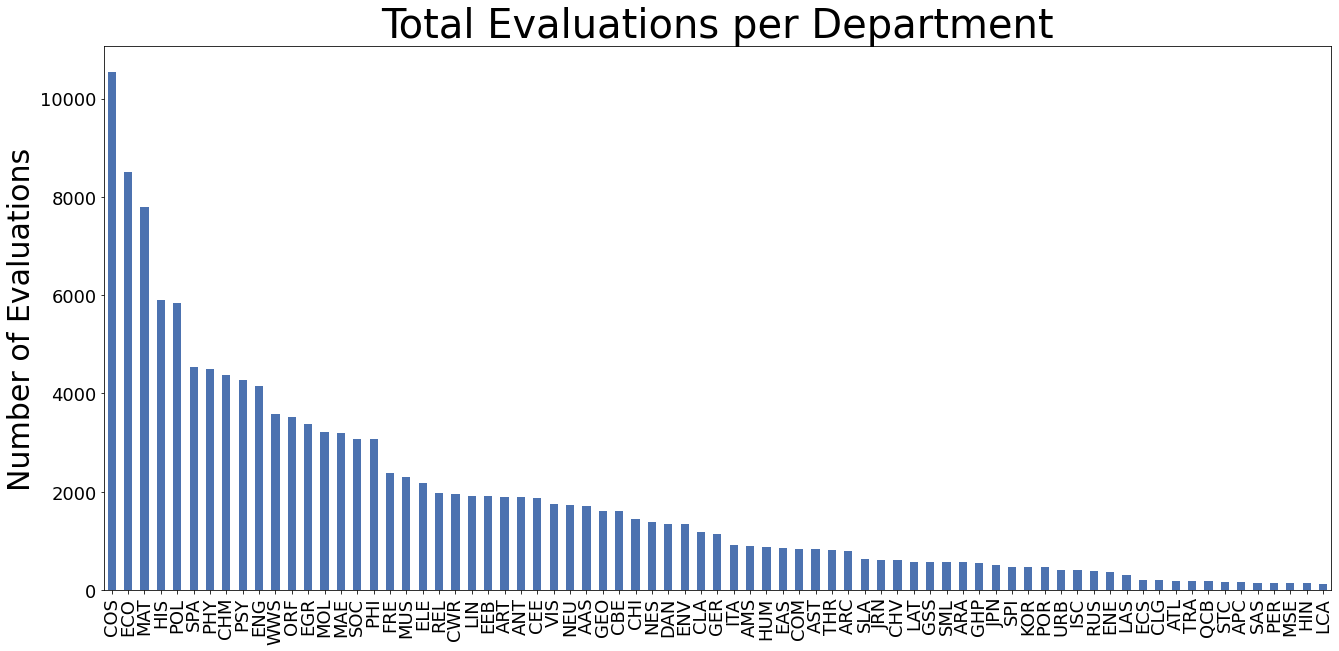

In [7]:
matplotlib.pyplot.rcParams['axes.prop_cycle'] = cycler(color=['#4c72b0', '#55a868', '#c44e52', '#8172b2'])
plt.rcParams.update({'font.size': 22})
evals_by_dept = evals['department'].value_counts()
print("Number of Depts Post-Cleaning: " , len(evals_by_dept), "\nAverage Evaluations per Department: ", evals_by_dept.sum()/len(evals_by_dept))
print("Mediam Evaluations per Dept: ", evals_by_dept.median())
ax = evals_by_dept.head(75).plot(kind="bar", figsize=(22, 10), fontsize=18)
ax.set_ylabel("Number of Evaluations", fontsize=30)
ax.set_title("Total Evaluations per Department", fontsize=40)

Number of Courses Post-Cleaning:  2708
Average Evals per Course:  50.63810930576071
Median Evaluations per Course title    16.0
dtype: float64


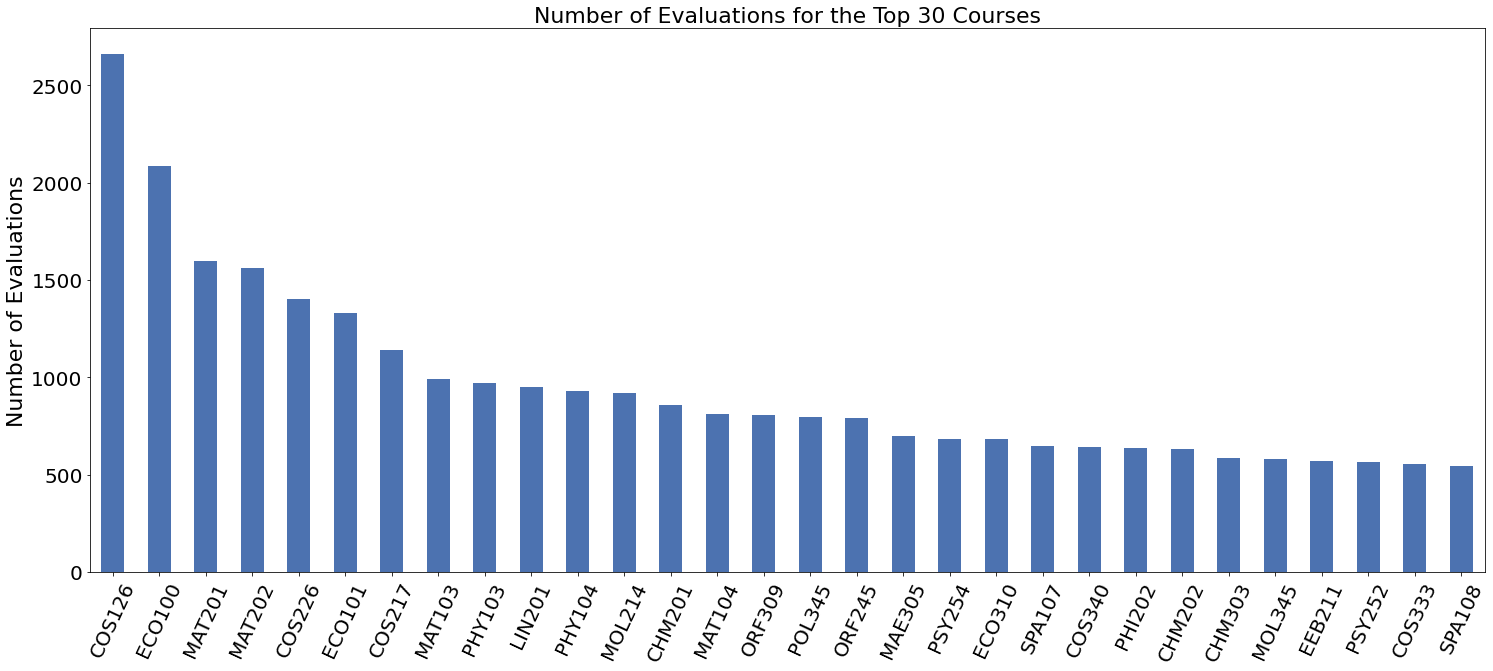

In [8]:
evals_by_course = evals['title'].value_counts()
from cycler import  cycler
matplotlib.pyplot.rcParams['axes.prop_cycle'] = cycler(color=['#4c72b0', '#55a868', '#c44e52', '#8172b2'])
plt.rcParams.update({'font.size': 22})

print("Number of Courses Post-Cleaning: ", len(evals_by_course))
print("Average Evals per Course: ", sum(evals_by_course)/len(evals_by_course))
title_counts = pd.DataFrame(evals['title'].value_counts(), columns=['title'])
top_title_counts = title_counts.head(30)
ax = top_title_counts.plot(kind ="bar", legend = False, rot = 65, fontsize = 20, figsize = (25, 10), ylabel = "Number of Evalluations", title = "Number of Evaluations for the Top 30 Courses")
ax.set_ylabel("Number of Evaluations", fontsize=22)
ax.set_title("Number of Evaluations for the Top 30 Courses", fontsize=22)
print("Median Evaluations per Course", title_counts.median())

In [9]:
all_depts = sorted(list(evals.department.value_counts().index))

In [10]:
engineering_depts = ['CBE', 'CEE', 'COS', 'EGR', 'ELE', 'MAE', 'MSE', 'ORF']
natural_sciences_depts = ['APC', 'AST', 'CHM', 'EEB', 'ENE', 'ENV', 'GEO', 'ISC', 'MAT', 'MOL', 'NEU', 'PHY', 'PSY', 'QCB', 'SML', 'STC']
social_sciences_depts = ['AAS', 'AMS', 'ANT', 'ECO', 'ECS', 'GHP', 'GSS', 'HIS', 'LAS', 'LIN', 'POL', 'SOC', 'SPI', 'TRA', 'URB', 'WWS']
humanities_depts = ['ARA', 'ARC', 'ART', 'ATL', 'CHI', 'CHV', 'CLA', 'CLG', 'COM', 'CWR', 'DAN', 'EAS', 'ENG', 'FRE', 'GER', 'HIN', 'HUM', 'ITA', 'JPN', 'JRN', 'KOR', 'LAT', 'LCA', 'MUS', 'NES', 'PER', 'PHI', 'POR', 'REL', 'RUS', 'SAS', 'SLA', 'SPA', 'THR', 'VIS']


In [11]:
course_level = []
enrollment_bucket = []
disciplines = []
for ind in evals.index:
  course_level.append(str(evals['catalogNumber'][ind])[0])
  enrollment = evals['enrollment'][ind]
  if enrollment <= 20:
    enrollment_bucket.append(1)
  elif enrollment > 20 and enrollment <= 50:
    enrollment_bucket.append(2)
  elif enrollment > 50 and enrollment < 101:
    enrollment_bucket.append(3)
  else:
    enrollment_bucket.append(4)
  discipline = evals['department'][ind]
  if discipline in engineering_depts:
    disciplines.append(1)
  elif discipline in humanities_depts:
    disciplines.append(2)
  elif discipline in natural_sciences_depts:
    disciplines.append(3)
  else:
    disciplines.append(4)
evals['course_level'] = course_level
evals['enrollment_category'] = enrollment_bucket
evals['disciplines'] = disciplines



In [12]:
time_manage  = [' schedule', ' plan', ' procrastinate', ' manage', ' time', ' late', 
 'early', ' planner', ' calendar', ' cram', ' deadline', ' routine', ' keep up', ' weekly', ' balance', ' fast', ' prioritize', ' hour']
reading_strat = [' highlight', ' textbook', ' readings', ' papers', ' annotate', ' book', ' read', ' critical', 
                 ' criticize', ' summarize', ' author', ' text ', ' essay', ' chapter', ' argument', ' article']
resource_usage = [' offic hours', ' preceptor', ' friends', ' mcgraw', ' tutor', ' studi buddy', 
                  ' instructor', ' collaborate', ' classmate', ' partner', ' friend', ' lecturer', ' ta ', ' tas ']
exam_prep = [' memorize', ' flashcards', ' summarize', ' practice', ' outline', ' review', ' notes', 
             ' study', ' synthesize', ' midterm', ' final', ' exam', ' test', ' quiz', ' assessment']
problem_solving = [' problem sets', ' problem', ' solve', ' mcgraw', ' calculate', ' solution', ' pset', ' homework']
stemmer = SnowballStemmer(language='english')
time_manage = [stemmer.stem(t) for t in time_manage]
reading_strat = [stemmer.stem(t) for t in reading_strat]
resource_usage = [stemmer.stem(t) for t in resource_usage]
exam_prep = [stemmer.stem(t) for t in exam_prep]
problem_solving = [stemmer.stem(t) for t in problem_solving]
print(time_manage, reading_strat, resource_usage, exam_prep, problem_solving)


[' schedul', ' plan', ' procrastin', ' manag', ' time', ' late', 'earli', ' planner', ' calendar', ' cram', ' deadlin', ' routin', ' keep up', ' week', ' balanc', ' fast', ' priorit', ' hour'] [' highlight', ' textbook', ' read', ' paper', ' annot', ' book', ' read', ' critic', ' critic', ' summar', ' author', ' text ', ' essay', ' chapter', ' argument', ' articl'] [' offic hour', ' preceptor', ' friend', ' mcgraw', ' tutor', ' studi buddi', ' instructor', ' collabor', ' classmat', ' partner', ' friend', ' lectur', ' ta ', ' tas '] [' memor', ' flashcard', ' summar', ' practic', ' outlin', ' review', ' note', ' studi', ' synthes', ' midterm', ' final', ' exam', ' test', ' quiz', ' assess'] [' problem set', ' problem', ' solv', ' mcgraw', ' calcul', ' solut', ' pset', ' homework']


In [13]:
i = 0
seen = False
time_manage_seen = []
for ind in evals.index:
  seen = False
  for word in time_manage:
    if word in str(evals['cleaned_comment'][ind]):
      if word != ' hour':
        i+=1
        seen = True
        time_manage_seen.append(1)
        break
      elif ' offic' not in str(evals['cleaned_comment'][ind]):
        i+=1
        seen = True
        time_manage_seen.append(1)
        break
  if seen == False:
    time_manage_seen.append(0)


In [14]:
i = 0
seen = False
reading_strat_seen = []
for ind in evals.index:
  seen = False
  for word in reading_strat:
    if word in str(evals['cleaned_comment'][ind]):
      i+=1
      seen = True
      reading_strat_seen.append(1)
      break
  if seen == False:
    reading_strat_seen.append(0)


In [15]:
i = 0
seen = False
resource_usage_seen = []
for ind in evals.index:
  seen = False
  for word in resource_usage:
    if word in str(evals['cleaned_comment'][ind]):
      i+=1
      seen = True
      resource_usage_seen.append(1)
      break
  if seen == False:
    resource_usage_seen.append(0)


In [16]:
i = 0
seen = False
exam_prep_seen = []
for ind in evals.index:
  seen = False
  for word in exam_prep:
    if word in str(evals['cleaned_comment'][ind]):
      i+=1
      seen = True
      exam_prep_seen.append(1)
      break
  if seen == False:
    exam_prep_seen.append(0)


In [17]:
i = 0
seen = False
problem_solving_seen = []
for ind in evals.index:
  seen = False
  for word in problem_solving:
    if word in str(evals['cleaned_comment'][ind]):
      i+=1
      seen = True
      problem_solving_seen.append(1)
      break
  if seen == False:
    problem_solving_seen.append(0)


In [18]:
evals['problem_solving'] = problem_solving_seen
evals['exam_prep'] = exam_prep_seen
evals['time_manage'] = time_manage_seen
evals['resource_usage'] = resource_usage_seen
evals['reading_strat'] = reading_strat_seen
enrollment_sorted = evals.sort_values(by='enrollment')
enrollment_sorted



,Unnamed: 0,comment,cleaned_comment,course,courseID,catalogNumber,classes,title,semester,department,crosslistings,track,percent_eval,evals_total,enrollment,semesters,course_level,enrollment_category,disciplines,problem_solving,exam_prep,time_manage,resource_usage,reading_strat
61348,64859,great course,great cours,1182010535,10535,351,"[{""class_number"":""22311"",""section"":""C01"",""stat...",EGR351,1182,EGR,[],UGRD,1.000000,1,1,NaN,3,1,1,0,0,0,0,0
119199,128166,"So, I am not Arab American, and I entered this...",arab american enter cours zero background subj...,1212015685,15685,482,"[{""class_number"":""22606"",""section"":""S01"",""stat...",HIS482,1212,HIS,"[{""_id"":{""$oid"":""5fa960b2a78bad0004f45ab5""},""d...",UGRD,1.000000,1,1,NaN,4,1,4,0,1,1,1,1
101665,108179,A really fun class for anyone who is looking f...,realli fun class anyon look new way explor her...,1202001226,1226,305,"[{""class_number"":""22085"",""section"":""C01"",""stat...",CWR305,1202,CWR,"[{""_id"":{""$oid"":""5fa42c9ffc573a00165aed3a""},""d...",UGRD,1.000000,1,1,NaN,3,1,2,0,1,0,0,1
70256,74309,I took this course with no background in stoch...,took cours background stochast calculus matlab...,1182008752,8752,466,"[{""schedule"":{""meetings"":[{""room"":""101"",""build...",ECO466,1182,ECO,[],UGRD,1.000000,1,1,NaN,4,1,4,1,1,1,1,0
135220,146698,I would highly recommend this course to anyone...,would high recommend cours anyon consid one th...,1214011583,11583,407,"[{""class_number"":""41687"",""section"":""C01"",""stat...",KOR407,1214,KOR,"[{""_id"":{""$oid"":""605cad0c0abf7a0004a549d0""},""d...",UGRD,1.000000,1,1,NaN,4,1,2,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84616,89740,"This is not an ""easy course"" in my opinion. It...",easi cours opinion challeng requir keep up oth...,1192001381,1381,100,"[{""class_number"":""20996"",""section"":""L01"",""stat...",ECO100,1192,ECO,[],UGRD,0.524887,232,442,NaN,1,4,4,0,1,1,0,0
84615,89739,This is a good intro level course to take. Goi...,good intro level cours take go lectur definit ...,1192001381,1381,100,"[{""class_number"":""20996"",""section"":""L01"",""stat...",ECO100,1192,ECO,[],UGRD,0.524887,232,442,NaN,1,4,4,1,0,0,1,0
84614,89738,It was good,good,1192001381,1381,100,"[{""class_number"":""20996"",""section"":""L01"",""stat...",ECO100,1192,ECO,[],UGRD,0.524887,232,442,NaN,1,4,4,0,0,0,0,0
84624,89748,Take it,take,1192001381,1381,100,"[{""class_number"":""20996"",""section"":""L01"",""stat...",ECO100,1192,ECO,[],UGRD,0.524887,232,442,NaN,1,4,4,0,0,0,0,0


In [19]:
evals.to_csv(path_or_buf = '/content/drive/MyDrive/COS /Independent Work/labeled_evaluations.csv')

findfont: Font family ['Computer Modern'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Computer Modern'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Computer Modern'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Computer Modern'] not found. Falling back to DejaVu Sans.


exam_prep 27521
problem_solving 14716
reading_strat 30279
resource_usage 38107
time_manage 33377
[0.2006957003675398, 0.10731579254419228, 0.22080829589872236, 0.27789364681173795, 0.24340032670205938]


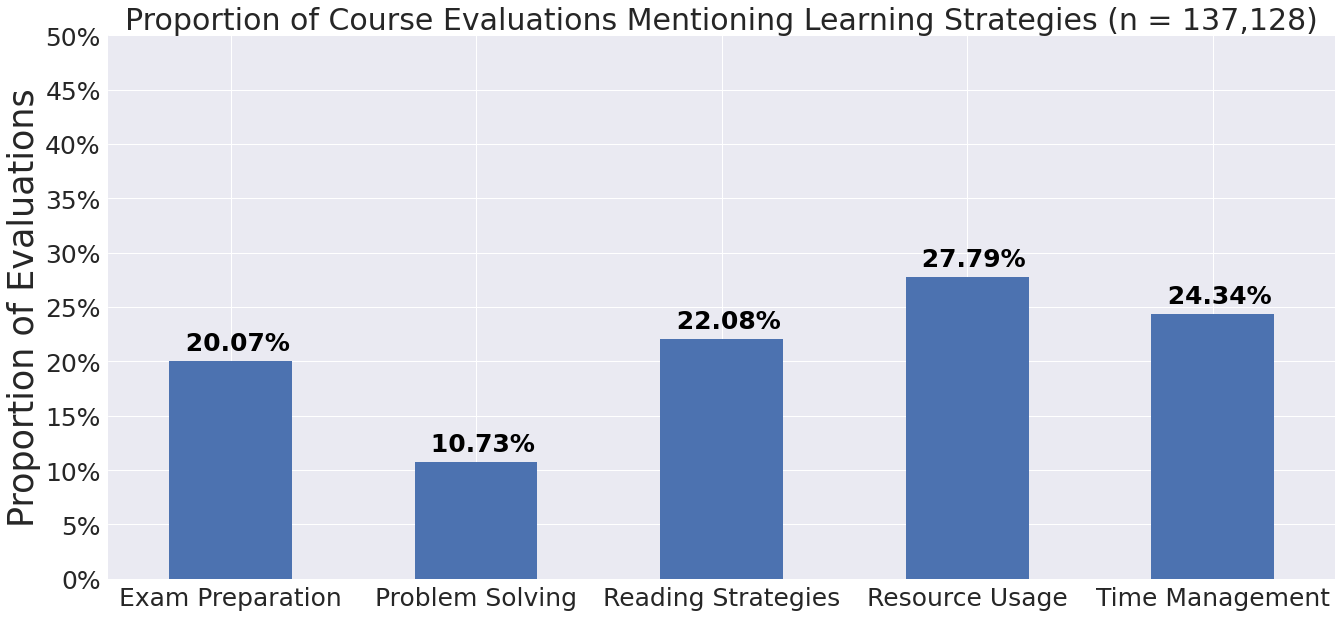

In [20]:
matplotlib.style.use('seaborn')
matplotlib.pyplot.rcParams["font.family"] = "Computer Modern"

data = []
strats = ['exam_prep', 'problem_solving', 'reading_strat', 'resource_usage', 'time_manage']
index = ['Exam Preparation', 'Problem Solving', 'Reading Strategies', 'Resource Usage', 'Time Management']

for i in strats:
  print(i, evals[i].value_counts()[1])
  seen = evals[i].value_counts()[1]
  data.append(seen/len(evals))
print(data)
df = pd.DataFrame({'strats': strats,
                   'data': data}, index=index)
ax = df.plot.bar(rot=0, figsize=(22, 10), fontsize=25)
ax.set_ylim((0, 0.5))
ticks = []
for i in range(11):
  ticks.append(i*0.05)
ax.set_yticks(ticks)
ax.set_yticklabels([f'{round(tick*100)}%' for tick in ticks], fontsize=25, fontname="Computer Modern")
ax.legend_ = None
ax.set_title("Proportion of Course Evaluations Mentioning Learning Strategies (n = 137,128)", fontsize=30, fontname="Computer Modern")
ax.set_ylabel("Proportion of Evaluations", fontsize=35, fontname="Computer Modern")
for i, v in enumerate(data):
    ax.text(i - 0.22, v+0.01, str(f'{100*v: .2f}%'), color='black', fontweight='bold', fontsize=25, fontname="Computer Modern")

In [21]:
#McNemar's Test with no continuity correction
data = np.zeros((2, 2))
for i in ['time_manage', 'exam_prep', 'problem_solving', 'reading_strat', 'resource_usage']:
  for j in ['time_manage', 'exam_prep', 'problem_solving', 'reading_strat', 'resource_usage']:
    data = np.zeros((2, 2))
    if i != j:
      print(i, j)
      for a in range(2):
        for b in range(2):
          data[a][b] = evals.value_counts([i, j])[a][b]
      if mcnemar(data, exact=False).pvalue >= 0:
        print(mcnemar(data, exact=False))





time_manage exam_prep
pvalue      1.5719255615215235e-196
statistic   894.4587225382247
time_manage problem_solving
pvalue      0.0
statistic   10075.395700107063
time_manage reading_strat
pvalue      2.8740163275205873e-52
statistic   231.4529198841699
time_manage resource_usage
pvalue      2.0495400949148223e-109
statistic   493.8704341681021
exam_prep time_manage
pvalue      1.5719255615215235e-196
statistic   894.4587225382247
exam_prep problem_solving
pvalue      0.0
statistic   5884.297620329493
exam_prep reading_strat
pvalue      4.8428986305853123e-45
statistic   198.32617544225852
exam_prep resource_usage
pvalue      0.0
statistic   2791.5643063583816
problem_solving time_manage
pvalue      0.0
statistic   10075.395700107063
problem_solving exam_prep
pvalue      0.0
statistic   5884.297620329493
problem_solving reading_strat
pvalue      0.0
statistic   6430.073122162335
problem_solving resource_usage
pvalue      0.0
statistic   14689.796740327041
reading_strat time_manage
pval

<Figure size 576x396 with 0 Axes>

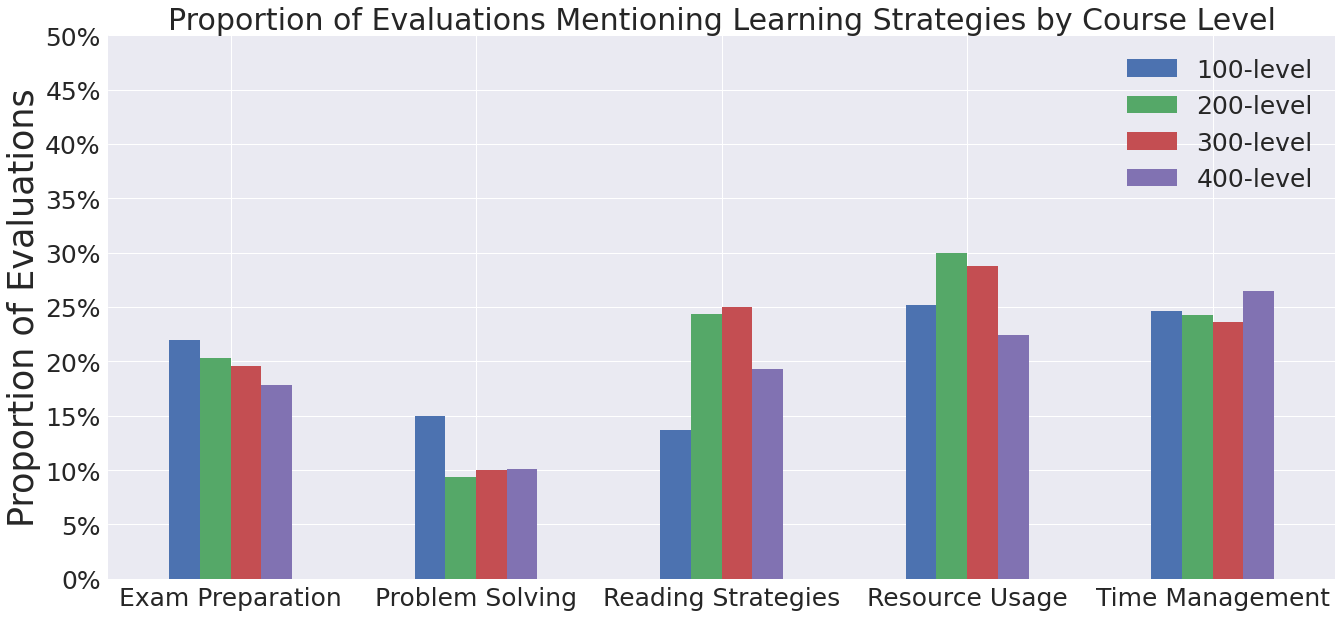

In [22]:
matplotlib.style.use('seaborn')
matplotlib.pyplot.rcParams["font.family"] = "Computer Modern"

plt.figure()
plt.rcParams.update({'font.size': 22}) 
data100 = []
data200 = []
data300 = []
data400 = []
strats = ['exam_prep', 'problem_solving', 'reading_strat', 'resource_usage', 'time_manage']
index = ['Exam Preparation', 'Problem Solving', 'Reading Strategies', 'Resource Usage', 'Time Management']
for i in strats:
  data100.append(evals.groupby('course_level')[i].mean()[0])
  data200.append(evals.groupby('course_level')[i].mean()[1])
  data300.append(evals.groupby('course_level')[i].mean()[2])
  data400.append(evals.groupby('course_level')[i].mean()[3])
 

df = pd.DataFrame({'strats': strats,
                   '100-level': data100, '200-level': data200, '300-level': data300, '400-level': data400}, index=index)

ax = df.plot.bar(
    rot=0, subplots=False, figsize=(22, 10), fontsize=25
)
for i in range(1):
  ax.set_ylim((0, 0.5))
  ticks = []
  for i in range(11):
    ticks.append(i*0.05)
  ax.set_yticks(ticks)
  ax.set_yticklabels([f'{round(tick*100)}%' for tick in ticks])
  ax.legend(fontsize=25)
  ax.set_title("Proportion of Evaluations Mentioning Learning Strategies by Course Level", fontsize=30, fontname="Computer Modern")
  ax.set_ylabel("Proportion of Evaluations", fontsize=35, fontname="Computer Modern")


In [23]:
data = np.zeros((2, 2))
for level in range(1, 5):
  print("--------------------Level: ", level)
  for i in ['time_manage', 'exam_prep', 'problem_solving', 'reading_strat', 'resource_usage']:
    for j in ['time_manage', 'exam_prep', 'problem_solving', 'reading_strat', 'resource_usage']:
      data = np.zeros((2, 2))
      if i != j:
        print(i, j)
        for a in range(2):
          for b in range(2):
            
            data[a][b] = evals[evals['course_level'] == str(level)].value_counts([i, j])[a][b]
     
        if mcnemar(data, exact=False).pvalue > 1e-4 and mcnemar(data, exact=False).pvalue < 0.05: 
          print(mcnemar(data, exact=False))
      

--------------------Level:  1
time_manage exam_prep
time_manage problem_solving
time_manage reading_strat
time_manage resource_usage
exam_prep time_manage
exam_prep problem_solving
exam_prep reading_strat
exam_prep resource_usage
problem_solving time_manage
problem_solving exam_prep
problem_solving reading_strat
problem_solving resource_usage
reading_strat time_manage
reading_strat exam_prep
reading_strat problem_solving
reading_strat resource_usage
resource_usage time_manage
resource_usage exam_prep
resource_usage problem_solving
resource_usage reading_strat
--------------------Level:  2
time_manage exam_prep
time_manage problem_solving
time_manage reading_strat
time_manage resource_usage
exam_prep time_manage
exam_prep problem_solving
exam_prep reading_strat
exam_prep resource_usage
problem_solving time_manage
problem_solving exam_prep
problem_solving reading_strat
problem_solving resource_usage
reading_strat time_manage
reading_strat exam_prep
reading_strat problem_solving
reading_s

In [24]:
for i in ['time_manage', 'exam_prep', 'problem_solving', 'reading_strat', 'resource_usage']:
  print(i)
  for level in range(1, 5):
    for other_level in range(1, 5):
      if level != other_level:
        print(level, other_level)
        level_values = evals[evals['course_level'] == str(level)][i]
        comp_values = evals[evals['course_level'] == str(other_level)][i]
       
        values = [level_values.sum(), comp_values.sum()]
        total = [len(level_values), len(comp_values)]
        (chi2, p, arr) = ssp.proportions_chisquare(count = values, nobs = total)
        "chi2 = %4.2f, p-value = %4.3f" % (chi2, p)
        print(p)
  




time_manage
1 2
0.26319427619490005
1 3
0.0012927748240907698
1 4
5.8083015833793565e-05
2 1
0.26319427619490005
2 3
0.012930469025643711
2 4
7.575627684521939e-08
3 1
0.0012927748240907698
3 2
0.012930469025643711
3 4
6.479297065962615e-13
4 1
5.8083015833793565e-05
4 2
7.575627684521939e-08
4 3
6.479297065962615e-13
exam_prep
1 2
4.835159862799688e-07
1 3
2.7037054330316856e-14
1 4
6.60923459813034e-23
2 1
4.835159862799684e-07
2 3
0.0029229368511904507
2 4
2.8896150905667143e-11
3 1
2.7037054330316856e-14
3 2
0.0029229368511904507
3 4
2.949732877379697e-06
4 1
6.60923459813034e-23
4 2
2.8896150905667143e-11
4 3
2.949732877379697e-06
problem_solving
1 2
1.6659075732753904e-113
1 3
1.4761999531489673e-91
1 4
2.5277098390558747e-46
2 1
1.6659075732753904e-113
2 3
0.0021200877461828548
2 4
0.014531464876149945
3 1
1.4761999531489673e-91
3 2
0.0021200877461828548
3 4
0.7635683812019352
4 1
2.5277098390558747e-46
4 2
0.014531464876149945
4 3
0.7635683812019352
reading_strat
1 2
8.23055387

In [25]:
for i in ['time_manage', 'exam_prep', 'problem_solving', 'reading_strat', 'resource_usage']:
  print(i)
  for level in range(1, 5):
    for other_level in range(1, 5):
      if level != other_level:
        print(level, other_level)
        level_values = evals[evals['enrollment_category'] == level][i]
        comp_values = evals[evals['enrollment_category'] == other_level][i]
        
        values = [level_values.sum(), comp_values.sum()]
        total = [len(level_values), len(comp_values)]
        (chi2, p, arr) = ssp.proportions_chisquare(count = values, nobs = total)
        "chi2 = %4.2f, p-value = %4.3f" % (chi2, p)
        print(p)

time_manage
1 2
2.094838282814751e-05
1 3
0.1459812576723556
1 4
0.8090699694124682
2 1
2.094838282814751e-05
2 3
5.085591229933994e-09
2 4
8.540858758490438e-07
3 1
0.1459812576723556
3 2
5.085591229933994e-09
3 4
0.17929714103143163
4 1
0.8090699694124682
4 2
8.540858758490454e-07
4 3
0.17929714103143163
exam_prep
1 2
3.596074356633873e-61
1 3
6.2927200279025456e-117
1 4
5.271009249258629e-249
2 1
3.596074356633873e-61
2 3
5.7792861927588665e-12
2 4
3.2732839209997463e-68
3 1
6.2927200279025456e-117
3 2
5.7792861927588665e-12
3 4
7.442873411030337e-24
4 1
5.271009249259228e-249
4 2
3.273283920999652e-68
4 3
7.442873411030337e-24
problem_solving
1 2
3.3181195996866226e-109
1 3
8.56939350819717e-132
1 4
7.311874145838438e-270
2 1
3.318119599686528e-109
2 3
0.01196822420308925
2 4
4.756901594913118e-41
3 1
8.56939350819717e-132
3 2
0.01196822420308925
3 4
1.3398085451393412e-26
4 1
7.311874145838438e-270
4 2
4.756901594913186e-41
4 3
1.3398085451393507e-26
reading_strat
1 2
2.7366875104

In [26]:
for i in ['time_manage', 'exam_prep', 'problem_solving', 'reading_strat', 'resource_usage']:
  print(i)
  for level in range(1, 5):
    for other_level in range(1, 5):
      if level != other_level:
        level_values = evals[evals['disciplines'] == level][i]
        comp_values = evals[evals['disciplines'] == other_level][i]
       
        values = [level_values.sum(), comp_values.sum()]
        total = [len(level_values), len(comp_values)]
        (chi2, p, arr) = ssp.proportions_chisquare(count = values, nobs = total)
        "chi2 = %4.2f, p-value = %4.3f" % (chi2, p)
        print(p)

time_manage
3.841379523732429e-137
3.654175293493146e-58
4.541160448465698e-217
3.841379523732429e-137
1.4102354707012026e-17
5.502460544285191e-16
3.654175293493253e-58
1.4102354707012236e-17
2.430487016110618e-57
4.541160448465698e-217
5.502460544285191e-16
2.4304870161105828e-57
exam_prep
1.8307931781444947e-184
1.9872220499069774e-92
1.3844173693453454e-55
1.8307931781445992e-184
0.0
1.664355232109627e-42
1.987222049907034e-92
0.0
0.0
1.3844173693453454e-55
1.6643552321096503e-42
0.0
problem_solving
0.0
1.2677129586439454e-08
9.745849936299437e-265
0.0
0.0
8.756883775041744e-172
1.2677129586439507e-08
0.0
0.0
9.74584993629833e-265
8.756883775041744e-172
0.0
reading_strat
0.0
3.053922469160404e-136
0.0
0.0
2.8275264469310986e-140
2.9205194325794455e-18
3.053922469160404e-136
2.8275264469310986e-140
5.796474236521449e-234
0.0
2.9205194325794266e-18
5.796474236522111e-234
resource_usage
0.0
0.26022966784367907
1.0451204047875075e-22
0.0
0.0
0.0
0.26022966784367907
0.0
2.99528734948976

<Figure size 576x396 with 0 Axes>

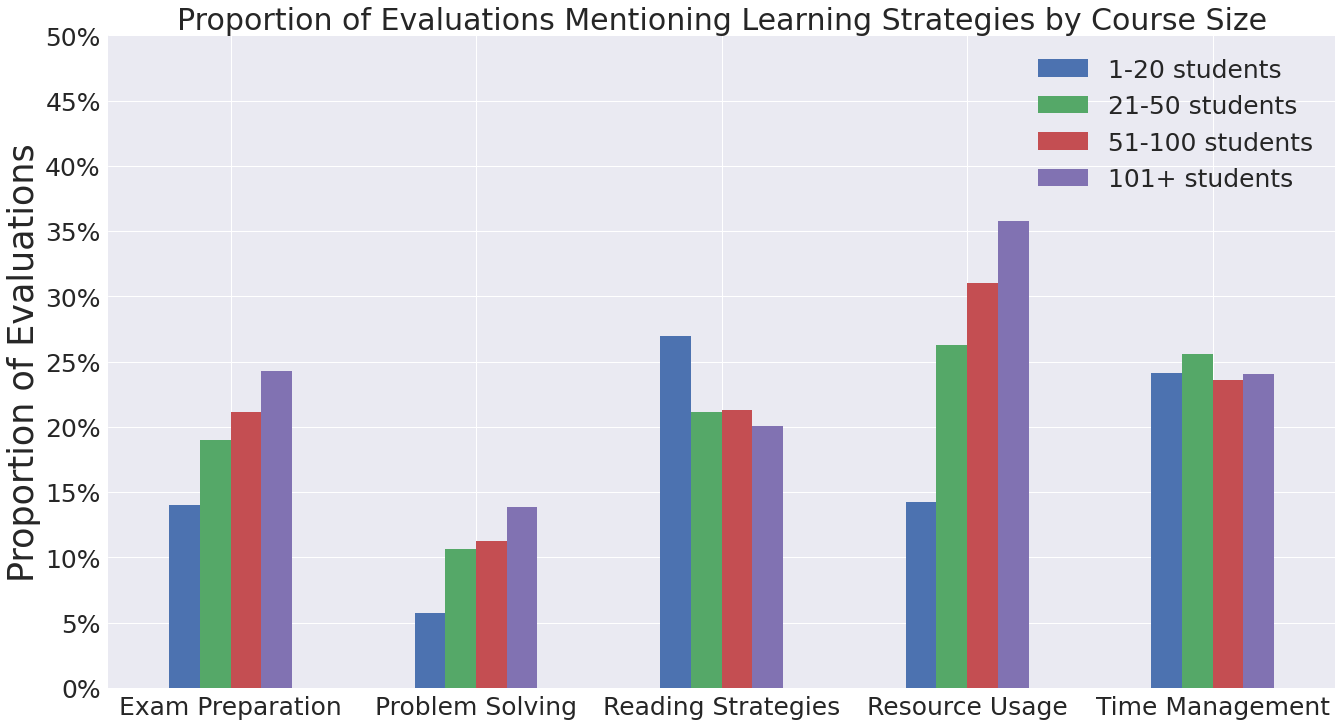

In [27]:
matplotlib.style.use('seaborn')
matplotlib.pyplot.rcParams["font.family"] = "Computer Modern"


plt.figure()
plt.rcParams.update({'font.size': 50})
data100 = []
data200 = []
data300 = []
data400 = []
strats = ['exam_prep', 'problem_solving', 'reading_strat', 'resource_usage', 'time_manage']
index = ['Exam Preparation', 'Problem Solving', 'Reading Strategies', 'Resource Usage', 'Time Management']

for i in strats:
  #print(i, evals.groupby('course_level')[i].mean())
  data100.append(evals.groupby('enrollment_category')[i].mean()[1])
  data200.append(evals.groupby('enrollment_category')[i].mean()[2])
  data300.append(evals.groupby('enrollment_category')[i].mean()[3])
  data400.append(evals.groupby('enrollment_category')[i].mean()[4])
 

df = pd.DataFrame({'strats': strats,
                   '1-20 students': data100, '21-50 students': data200, '51-100 students': data300, '101+ students': data400}, index=index)

ax = df.plot.bar(
    rot=0, subplots=False, figsize=(22, 12), fontsize=25
)
for i in range(1):
  ax.set_ylim((0, 0.5))
  ticks = []
  for i in range(11):
    ticks.append(i*0.05)
  ax.set_yticks(ticks)
  ax.set_yticklabels([f'{round(tick*100)}%' for tick in ticks])
  ax.legend(fontsize=25, loc='upper right')
  ax.set_title("Proportion of Evaluations Mentioning Learning Strategies by Course Size", fontsize=30, fontname="Computer Modern")
  ax.set_ylabel("Proportion of Evaluations", fontsize=35, fontname="Computer Modern")

<Figure size 576x396 with 0 Axes>

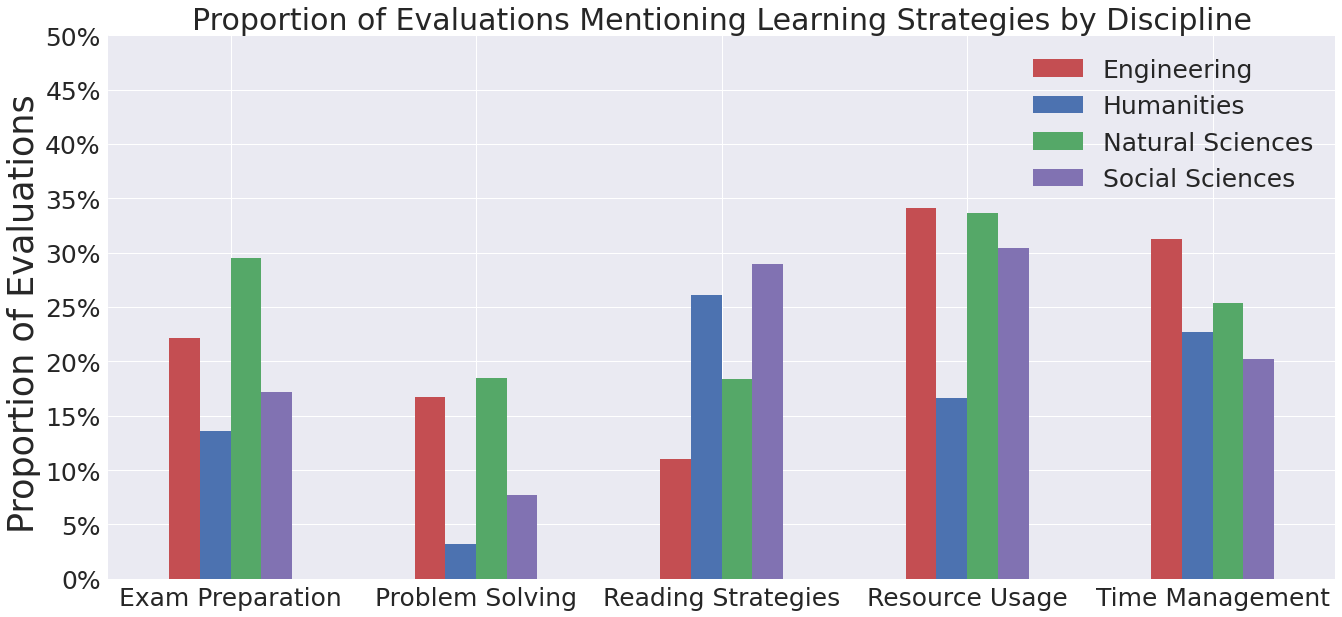

In [28]:
matplotlib.style.use('seaborn')
matplotlib.pyplot.rcParams["font.family"] = "Computer Modern"

matplotlib.pyplot.rcParams['axes.prop_cycle'] = cycler(color=['#c44e52', '#4c72b0', '#55a868', '#8172b2'])


plt.figure()
plt.rcParams.update({'font.size': 50}) 
engineering = []
social_sciences = []
natural_sciences = []
humanities = []
strats = ['exam_prep', 'problem_solving', 'reading_strat', 'resource_usage', 'time_manage']
index = ['Exam Preparation', 'Problem Solving', 'Reading Strategies', 'Resource Usage', 'Time Management']
print(evals.groupby('disciplines')['time_manage'])
for i in strats:
 
  engineering.append(evals.groupby('disciplines')[i].mean()[1])
  humanities.append(evals.groupby('disciplines')[i].mean()[2])
  natural_sciences.append(evals.groupby('disciplines')[i].mean()[3])
  social_sciences.append(evals.groupby('disciplines')[i].mean()[4])
  
 

df = pd.DataFrame({'strats': strats,
                   'Engineering': engineering, 'Humanities': humanities,   'Natural Sciences': natural_sciences, 'Social Sciences': social_sciences}, index=index)

ax = df.plot.bar(
    rot=0, subplots=False, figsize=(22, 10), fontsize=25
)
for i in range(1):
  ax.set_ylim((0, 0.5))
  ticks = []
  for i in range(11):
    ticks.append(i*0.05)
  ax.set_yticks(ticks)
  ax.set_yticklabels([f'{round(tick*100)}%' for tick in ticks])
  ax.legend(fontsize=25)
  ax.set_title("Proportion of Evaluations Mentioning Learning Strategies by Discipline", fontsize=30, fontname="Computer Modern")
  ax.set_ylabel("Proportion of Evaluations ", fontsize=35, fontname="Computer Modern")

In [30]:
strategies = strategies = ['exam_prep', 'problem_solving', 'reading_strat', 'resource_usage', 'time_manage']

for strat in strategies:
  coef = []
  print(strat)
  print('---------------------------------------------------')
  formula = strat + " ~ C(disciplines) + C(enrollment_category) + C(course_level)"
  mod1 = smf.glm(formula=formula, data=evals, family=sm.families.Binomial()).fit()
  print(mod1.summary())
  for i in mod1.params.index:
    coef.append((i, mod1.params[i], mod1.bse[i], np.exp(mod1.params[i]), mod1.pvalues[i]))
    
  coef.sort(key=lambda x: x[0], reverse=False)
  [print(x[0], x[3]) for x in coef]


exam_prep
---------------------------------------------------
                 Generalized Linear Model Regression Results                  
Dep. Variable:              exam_prep   No. Observations:               137128
Model:                            GLM   Df Residuals:                   137118
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -66933.
Date:                Wed, 19 Jan 2022   Deviance:                   1.3387e+05
Time:                        20:38:26   Pearson chi2:                 1.37e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------